# Anàlisi de les dades
## Nota sobre les limitacions de l'anàlisi 
Les dades obtingudes poden contenir errors deguts a:
- Errors en la recollida de dades a causa d'erros humans
- Errors en la classificació de les dades a causa d'errors informàtics
No es realitzarà una comprovació de les dades a causa de la magnitud de l'estudi i l'objectiu de l'anàlisi.
Tanmateix, en les conclusións de cada anàlisi es tindran en compte aquestes limitacions.

## Objectiu de l'anàlisi
TODO: Afegir objectiu de l'anàlisi

## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, comptatge_i_percentatge_cat, mitjana_i_std_num
from listas import num_var, cat_var, num_tests, cat_tests

## Càrrega de les dades
Les dades s'han tractat prèviament amb l'script 'process_database.py' i s'han guardat en un dataframe de Pandas. Aquestes dades contenen la informació de tots els pacients de l'estudi.

In [2]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

## Segmentació de les dades
Distribuiré les dades en 3 grups (més un grup que conté la totalitat de dades):
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECVV (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECVV
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECVV 
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECVV 
- **TOTAL**: aquest grup conté tots els pacients de l'estudi

### AMB_PA 

In [3]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,split_database
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,None,AMB_PA
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,None,AMB_PA
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,None,AMB_PA
4,93,1,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,None,0.0,NaT,NaN,Dependència total,Malnodrit,Risc moderat,Desconegut,None,AMB_PA
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,None,AMB_PA


# AMB_PA_MECVV

In [4]:
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)] 
AMB_PA_MECVV.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,split_database
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,None,AMB_PA
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,None,AMB_PA
12,86,1,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,0.0,0.0,2020-09-04,3.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0 kg,AMB_PA
27,100,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2021-09-14'}, {'valor...","[{'codi': 'C08CA', 'dataInici': '2020-11-23 00...","[{'data': '20201125131827', 'disfagia': 'S', '...",...,None,41.1,2020-12-02,7.0,Dependència total,Desconegut,Risc moderat,Desconegut,None,AMB_PA_MECVV
37,86,1,0,"[{'date': '20221003', 'name': 'GLUCOSA Sèrum',...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '72', 'data': '2022-10-09'}]","[{'codi': 'G04CA', 'dataInici': '2022-09-26 00...","[{'data': '20221012122425', 'disfagia': 'S', '...",...,0.0,0.0,2022-09-29,13.0,Dependència total,Malnodrit,Risc moderat,Desconegut,0 kg,AMB_PA


# SENSE_PA

In [5]:
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) & 
           (taula['P diagnosticada'] == 1.0)]
SENSE_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,split_database
13,71,0,0,"[{'date': '20220216', 'name': 'CULTIU Esput', ...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...","[{'dataValoracio': '2020-09-06', 'horaValoraci...",[],"[{'codi': 'C10AA', 'dataInici': '2020-09-06 00...","[{'data': '20200906175506', 'disfagia': 'N', '...",...,None,None,2022-02-14,525.0,Dependència severa,Desconegut,Risc moderat,Dèficit neurologic moderat,None,AMB_PA
25,83,0,0,"[{'date': '20220308', 'name': 'UREA Sèrum', 'l...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '0', 'estatMental': '1', 'humit...",[],"[{'valor': '57', 'data': '2022-11-03'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2022-09-27 00...","[{'data': '20220929091303', 'disfagia': 'S', '...",...,None,-6.2,2023-04-09,192.0,Dependència moderada,Malnodrit,Risc baix,Desconegut,None,SENSE_PA
28,95,0,0,"[{'date': '20220526', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2022-05-30'}]","[{'codi': 'C10AA', 'dataInici': '2020-11-18 00...","[{'data': '20220529115841', 'disfagia': 'S', '...",...,0.0,0.0,2022-11-07,162.0,Dependència total,Desconegut,Risc moderat,Desconegut,0 kg,AMB_PA
31,89,1,0,"[{'date': '20220318', 'name': 'BILIRUBINA TOTA...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '75', 'data': '2022-01-11'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2021-12-23 00...","[{'data': '20220119101523', 'disfagia': 'N', '...",...,None,8.0,2023-05-05,458.0,Dependència moderada,Malnodrit,Risc moderat,Desconegut,None,AMB_PA
39,87,0,0,"[{'date': '20230619', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2021-01-17 00...","[{'data': '20220111085147', 'disfagia': 'S', '...",...,None,None,2023-06-19,524.0,Dependència severa,Desconegut,Risc baix,Desconegut,None,AMB_PA


# TOTAL

In [6]:
TOTAL = taula
taula.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,split_database
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,None,AMB_PA
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,None,AMB_PA
2,96,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-09 00...",[],...,None,None,2020-07-08,NaN,Dependència severa,Desconegut,Risc moderat,Desconegut,None,Desconegut
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,None,AMB_PA
4,93,1,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,None,0.0,NaT,NaN,Dependència total,Malnodrit,Risc moderat,Desconegut,None,AMB_PA


Ara que tinc totes les dades classificades en aquests grups, faré una descriptiva. També compararé els diferents grups amb el p-valor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual esperaré que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups. Els criteris que seguiré per utilitzar un test o un altre és, primer, fer un test de Shapiro-Wilk per comprovar si segueixen una distribució normal, si és així, usaré el T-test, si no, utilitzaré el de Mann-Whitney. Finalment, si la columna conté valors categòrics com és el cas del sexe (F/M), faré servir el test Xi-quadrat.


# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [ ]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var)

### Comptatges i percentatges de tests categòrics per grup

In [ ]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_tests)

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [ ]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_var)

### Mitjanes i desviacions estàndard dels tests numèrics per grup

In [ ]:
llista_dfs = [('AMB_PA', AMB_PA), ('AMB_PA_MECVV', AMB_PA_MECVV), ('SENSE_PA', SENSE_PA), ('TOTAL', TOTAL)]

mitjana_i_std_num(llista_dfs, num_tests)

## Nombre de pacients

In [ ]:
num_AMB_PA = len(AMB_PA)
num_AMB_PA_MECVV= len(AMB_PA_MECVV)
num_SENSE_PA = len(SENSE_PA)
num_TOTAL = len(TOTAL)

print("Nombre de pacients amb pneumònia aspirativa (cie = J69.0):", num_AMB_PA)
print("Nombre de pacients amb pneumònia i un MECV-V positiu:", num_AMB_PA_MECVV)
print("Nombre de pacients amb pneumònia sense comptar amb cie J69.0:", num_SENSE_PA)
print("Nombre total de pacients:", num_TOTAL)

#### Comparació distributiva. Test d'independència

No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

## Sexe

#### Comparació distributiva. Test d'independència

Chi-squared: 1.6027
P-value: 0.6588


IndexError: invalid index to scalar variable.

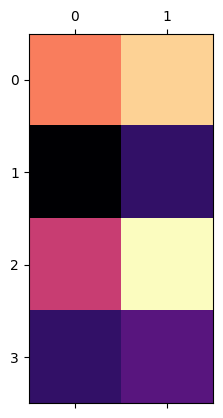

In [7]:
test_indepe_bin_plot(data_1=TOTAL['split_database'], data_2=TOTAL['sexe M'])

## Admissions

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Admissions'], 'AMB_PA_MECVV': AMB_PA_MECVV['Admissions'], 'SENSE_PA': SENSE_PA['Admissions'], 'TOTAL': TOTAL['Admissions']})

## Admissions per urgències

#### Comparació distributiva. Test d'independència 

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Emergències'], 'AMB_PA_MECVV': AMB_PA_MECVV['Emergències'], 'SENSE_PA': SENSE_PA['Emergències'], 'TOTAL': TOTAL['Emergències']})

## Disfàgia

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(data_1=TOTAL['split_database'], data_2=TOTAL['DO diagnosticada'])

## Index de Barthel

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})

## Categories índex de Barthel

#### Comparació distributiva. Test d'independència

Chi-squared: 20.7085
P-value: 0.0140


IndexError: invalid index to scalar variable.

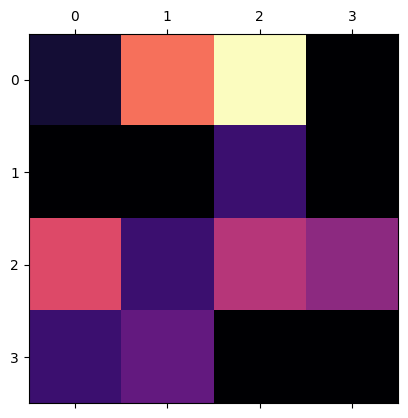

In [8]:
test_indepe_bin_plot(data_1=TOTAL['split_database'], data_2=TOTAL['Barthel categòric'])

### Index del MNA

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['MNA resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['MNA resultats'], 'SENSE_PA': SENSE_PA['MNA resultats'], 'TOTAL': TOTAL['MNA resultats']})

## Categories test MNA

#### Comparació distributiva. Test d'independència 

In [ ]:
test_indepe_bin_plot(taula, 'MNA categòric')

## Index de l'EMINA

### Comparació distributiva

In [ ]:
test_indepe_plot(({'AMB_PA': AMB_PA['EMINA categòric'], 'AMB_PA_MECVV': AMB_PA_MECVV['EMINA categòric'], 'SENSE_PA': SENSE_PA['EMINA categòric'], 'TOTAL': TOTAL['EMINA categòric']}))

## Categories de l'índex de l'EMINA

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_bin_plot(taula,'EMINA categòric')

## Index de la canadenca (escala neurològica canadenca)

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Canadenca categòrica'], 'AMB_PA_MECVV': AMB_PA_MECVV['Canadenca categòrica'], 'SENSE_PA': SENSE_PA['Canadenca categòrica'], 'TOTAL': TOTAL['Canadenca categòrica']})

## Categories de l'índex de la canadenca

#### Comparació distributiva. Test d'independència 

In [ ]:
test_indepe_bin_plot(taula, 'Canadenca categòrica')

## Infeccions respiratòries

#### Comparació distributiva. Test d'independència 

In [ ]:
test_indepe_bin_plot(taula,'Infeccions respiratòries principals diagnosticades')

In [ ]:
test_indepe_bin_plot(taula,'LRTI diagnosticada')

In [ ]:
test_indepe_bin_plot(taula, 'Exacerbacions de COPD diagnosticades')

In [ ]:
test_indepe_bin_plot(taula,'Fibrosi pulmonar i fibrotòrax diagnosticades')

# Resultats de laboratori

## Albúmina

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Albumin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Albumin'], 'SENSE_PA': SENSE_PA['Albumin'], 'TOTAL': TOTAL['Albumin']})

### Proteïnes totals

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Proteins'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Proteins'], 'SENSE_PA': SENSE_PA['Total Proteins'], 'TOTAL': TOTAL['Total Proteins']})

### Hemoglobina

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Hemoglobin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Hemoglobin'], 'SENSE_PA': SENSE_PA['Hemoglobin'], 'TOTAL': TOTAL['Hemoglobin']})

### Colesterol 

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Cholesterol'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Cholesterol'], 'SENSE_PA': SENSE_PA['Total Cholesterol'], 'TOTAL': TOTAL['Total Cholesterol']})

### Leucòcits

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Leucocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Leucocytes'], 'SENSE_PA': SENSE_PA['Leucocytes'], 'TOTAL': TOTAL['Leucocytes']})

### Limfòcits %

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Lymphocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Lymphocytes'], 'SENSE_PA': SENSE_PA['Lymphocytes'], TOTAL: TOTAL['Lymphocytes']})

### Proteïna C Reactiva

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['C reactive protein'], 'AMB_PA_MECVV': AMB_PA_MECVV['C reactive protein'], 'SENSE_PA': SENSE_PA['C reactive protein'], 'TOTAL': TOTAL['C reactive protein']})

### Urea 

#### Comparació distributiva. Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Urea'], 'AMB_PA_MECVV': AMB_PA_MECVV['Urea'], 'SENSE_PA': SENSE_PA['Urea'], 'TOTAL': TOTAL['Urea']})

### Filtració glomerular

#### Comparació distributiva. Test d'independència.

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Glomerular Filtrate'], 'AMB_PA_MECVV': AMB_PA_MECVV['Glomerular Filtrate'], 'SENSE_PA': SENSE_PA['Glomerular Filtrate'], 'TOTAL': TOTAL['Glomerular Filtrate']})